In [ ]:
!OMP_NUM_THREADS=1 meson test -C build/ hamiltonian --verbose -t 0 2> notes/capture/ordinary_run.txt

In [ ]:
import re
import pandas as pd

# Define the file path
file_path = "notes/capture/ordinary_run.txt"

# Read the file content
def parse_to_datafame(file_path):
  with open(file_path, "r") as file:
      content = file.read()
  # Define a regex pattern to extract the test case and its details
  pattern = r" structure (?P<structure>.+)\s+nat\s+(?P<nat>\d+)\s+nprim\s+(?P<nprim>\d+)\s+maxl\s+(?P<maxl>\d+)\s+max_nnl\s+(?P<max_nnl>\d+)\s+mean_nnl\s+(?P<mean_nnl>\d+)\s+max_nsh\s+(?P<max_nsh>\d+)\s+cpu_time\s+(?P<cpu_time>[\d.]+)\s+gpu_gb_in\s+(?P<gpu_gb_in>[\d.]+)\s+gpu_gb_out\s+(?P<gpu_gb_out>[\d.]+)\s+gpu_gb_total\s+(?P<gpu_gb_total>[\d.]+)\s+gpu_between_atoms\s+(?P<gpu_between_atoms>[\d.]+)\s+gpu_in_atoms\s+(?P<gpu_in_atoms>[\d.]+)\s+gpu_time\s+(?P<gpu_time>[\d.]+)\s+gpu_walltime\s+(?P<gpu_walltime>[\d.]+)"

  # Use re.finditer to extract all matches
  matches = re.finditer(pattern, content)

  # Create a list of dictionaries to store the extracted data
  data = []
  for match in matches:
      data.append(match.groupdict())

  # Convert the list of dictionaries into a pandas DataFrame
  df = pd.DataFrame(data)

# Convert numeric columns to appropriate data types
  numeric_columns = [
    'nat', 'nprim', 'maxl', 'max_nnl', 'mean_nnl', 'max_nsh',
    'cpu_time', 'gpu_gb_in', 'gpu_gb_out', 'gpu_gb_total',
    'gpu_between_atoms', 'gpu_in_atoms', 'gpu_time', 'gpu_walltime'
  ]
  # Convert the numeric columns to float
  df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

  # Display the DataFrame
  df = df.sort_values('nat')
  return df

df = parse_to_datafame(file_path)
alkanes = df[df['structure'].str.contains('alkane')]
# remove alkanes from this
df = df[~df['structure'].str.contains('alkane')]

In [34]:
df

,structure,nat,nprim,maxl,max_nnl,mean_nnl,max_nsh,cpu_time,gpu_gb_in,gpu_gb_out,gpu_gb_total,gpu_between_atoms,gpu_in_atoms,gpu_time,gpu_walltime
0,H2,2,6,0,1,0,1,0.029232,0.000001,0.000000,0.000002,7.123968,0.577536,7.701504,1540.075594
1,dna,387,6,2,165,69,3,479.240172,0.232067,0.231803,0.463871,332.132477,8.164640,340.297119,444.641304
3,101d-netropsin-and-dna,556,6,2,484,203,3,868.021307,0.479133,0.478153,0.957286,789.224548,10.201280,799.425842,1006.987184
2,1lyz-lysozyme,1102,6,2,311,99,3,1229.472555,1.749900,1.748891,3.498791,954.379517,16.050880,970.430420,1739.403851
4,103l-hydrolase,1404,6,2,310,99,3,1659.693161,2.816439,2.815150,5.631588,1199.698853,19.372032,1219.070923,2434.040173


In [35]:
alkanes

,structure,nat,nprim,maxl,max_nnl,mean_nnl,max_nsh,cpu_time,gpu_gb_in,gpu_gb_out,gpu_gb_total,gpu_between_atoms,gpu_in_atoms,gpu_time,gpu_walltime
5,alkane_10,30,6,1,25,13,2,3.655067,0.000324,0.000317,0.000641,2.480128,1.038336,3.518464,4.205426
6,alkane_342,1026,6,1,30,21,2,193.318016,0.370811,0.370542,0.741353,109.503716,7.779328,117.283043,300.323111
7,alkane_674,2022,6,1,30,21,2,446.025699,1.439677,1.439146,2.878823,157.708282,10.181632,167.889908,831.062289
8,alkane_1006,3018,6,1,30,21,2,695.135937,3.206922,3.206130,6.413052,234.796005,14.437152,249.233154,1731.261886
9,alkane_1338,4014,6,1,30,21,2,1077.579243,5.672547,5.671493,11.344040,312.482117,18.915232,331.397339,2964.652845
10,alkane_1671,5013,6,1,30,21,2,1397.729955,8.847136,8.845819,17.692955,13480.588867,676.192444,14156.781250,17335.368212


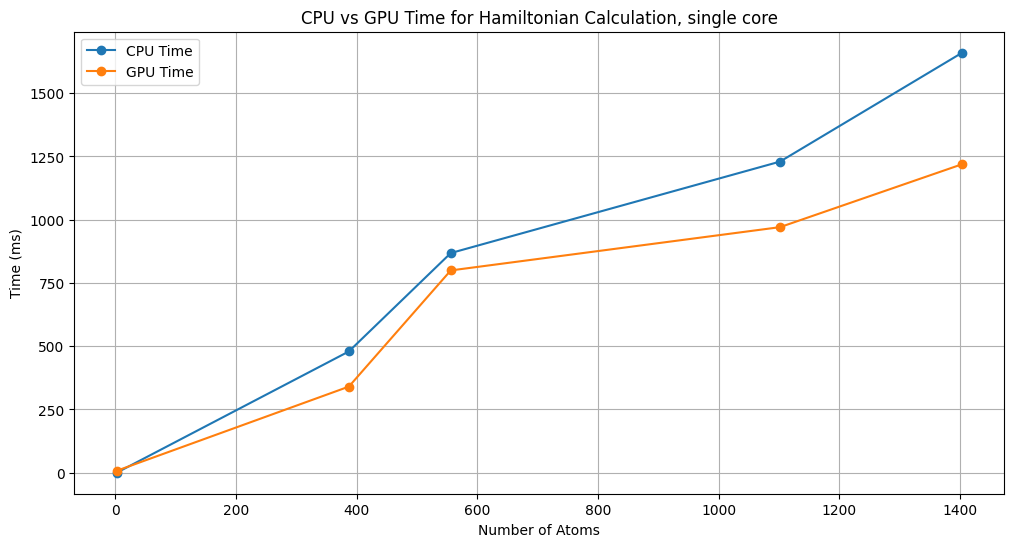

In [30]:
import matplotlib.pyplot as plt

# Line plot for time vs number of atoms, and compare CPU and GPU times
plt.figure(figsize=(12, 6))
plt.plot(df['nat'], df['cpu_time'], label='CPU Time', marker='o')
plt.plot(df['nat'], df['gpu_time'], label='GPU Time', marker='o')
plt.xlabel('Number of Atoms')
plt.ylabel('Time (ms)')
plt.title('CPU vs GPU Time for Hamiltonian Calculation, single core')
plt.legend()
plt.grid()
plt.savefig('notes/figures/1cpu_vs_gpu_time_ms_proteins.png')
plt.show()

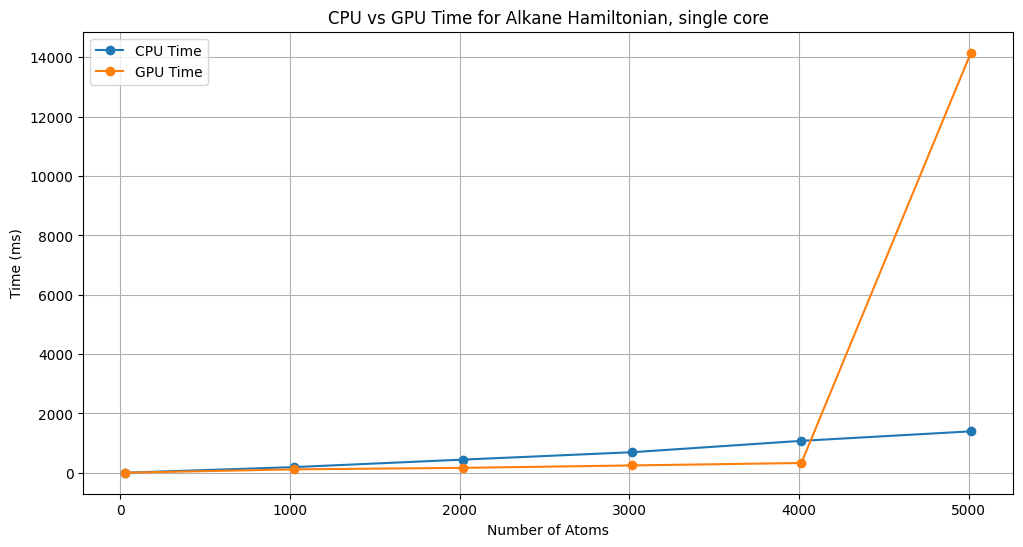

In [ ]:
# Plot for alkanes
plt.figure(figsize=(12, 6))
plt.plot(alkanes['nat'], alkanes['cpu_time'], label='CPU Time', marker='o')
plt.plot(alkanes['nat'], alkanes['gpu_time'], label='GPU Time', marker='o')
plt.xlabel('Number of Atoms')
plt.ylabel('Time (ms)')
plt.title('CPU vs GPU Time for Alkane Hamiltonian, single core')
plt.legend()
plt.grid()
plt.savefig('notes/figures/1cpu_vs_gpu_alkanes.png')

In [32]:
# Enable all CPU cores
!OMP_NUM_THEADS=32 meson test -C build/ hamiltonian --verbose -t 0 > notes/capture/multicore_run.txt

In [36]:
df = parse_to_datafame("notes/capture/multicore_run.txt")
# remove alkanes from this
alkanes = df[df['structure'].str.contains('alkane')]
df = df[~df['structure'].str.contains('alkane')]

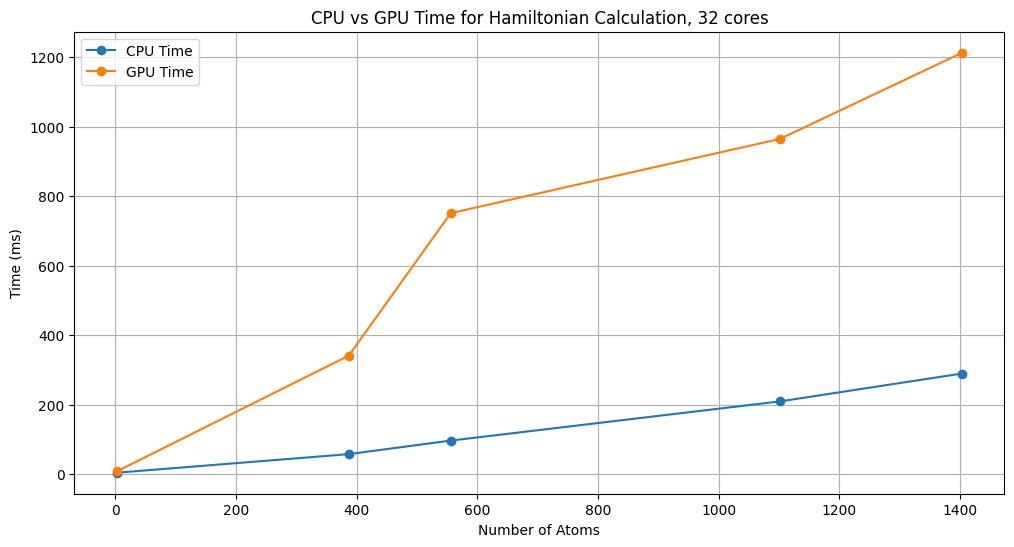

In [ ]:
import matplotlib.pyplot as plt

# Line plot for time vs number of atoms, and compare CPU and GPU times
plt.figure(figsize=(12, 6))
plt.plot(df['nat'], df['cpu_time'], label='CPU Time', marker='o')
plt.plot(df['nat'], df['gpu_time'], label='GPU Time', marker='o')
plt.xlabel('Number of Atoms')
plt.ylabel('Time (ms)')
plt.title('32vCPU vs GPU Time for Hamiltonian Calculation')
plt.legend()
plt.grid()
plt.savefig('notes/figures/32cpu_vs_gpu_time_ms_proteins.png')
plt.show()

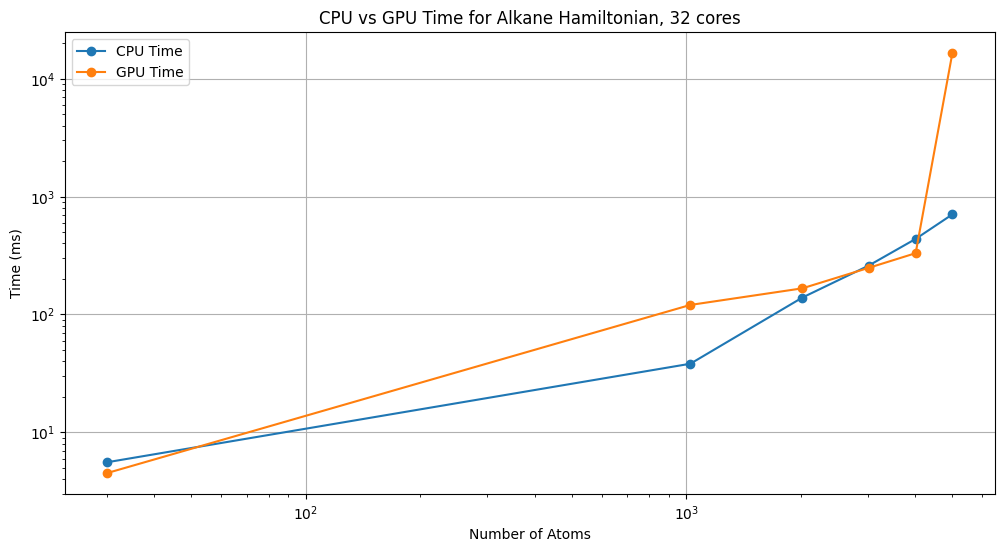

In [ ]:
# Line logplot for time vs number of atoms for alkanes
plt.figure(figsize=(12, 6))
plt.plot(alkanes['nat'], alkanes['cpu_time'], label='CPU Time', marker='o')
plt.plot(alkanes['nat'], alkanes['gpu_time'], label='GPU Time', marker='o')
plt.xlabel('Number of Atoms')
plt.ylabel('Time (ms)')
plt.title('32vCPU vs GPU Time for Alkane Hamiltonian')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.savefig('notes/figures/32cpu_vs_gpu_alkanes.png')
plt.show()